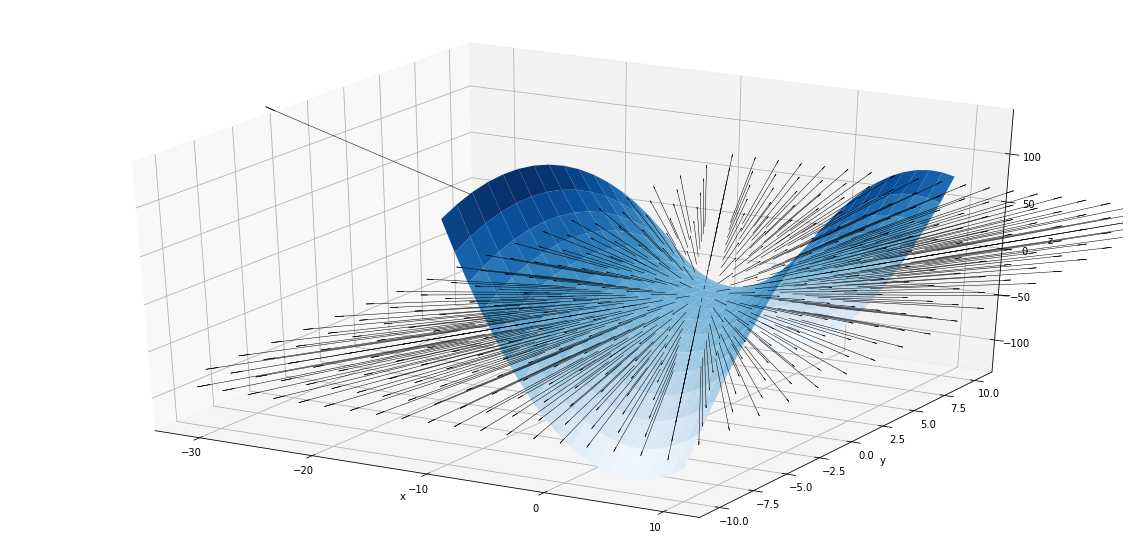

In [48]:
# Plot a 3d surface & its gradient in same graph
#--------------------------------------------------------------------------------
# %matplotlib inline

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def f(x, y):
    return x**2 - y**2 + x*y - x -y


def gradient(h):
    return (h.diff(x), h.diff(y))


x,y = sp.symbols('x y')
g = x**2 - y**2 + x*y - x- y
grad = gradient(g)

xrange = np.linspace(-10, 10, 20)
yrange = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(xrange, yrange)
Z = f(X, Y)
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot_surface(X, Y, Z,cmap='Blues', edgecolor='none')

Z=0
U=X
V=Y
W=Z

for i in range(0,len(xrange),20):
    for j in range(0,len(yrange),20):
        x1 = X[i,j]
        y1 = Y[i,j]
        U[i,j] = grad[0].subs({x:x1, y:y1})
        V[i,j] = grad[1].subs({x:x1, y:y1})
ax.quiver(X,Y,Z,U,V,W, linewidth=0.5,arrow_length_ratio=0.05,color='Black')

plt.show()


In [49]:
"""
This code will take an arbitrary polynomial function & perform following tasks.
1) Calculate the critical points by solving the system of equations formed by setting each partial derivative to zero.
2) Exclude the trivial and imaginary solutions from the above list
3) Calculate the Hessian matrix of second order partial derivatives.
4) Evaluate the Hessian matrix at each of the critical points
5) Calculate the Eigen values of the Hessian matrix at each Critical point
6) Identify maxima , minima , or a saddle point for the function depending on the Eigen values being all positive , 
all negative , or mixed.

"""


def complex_root(root):
    for element in root:
        try:
             k = float(element)
        except TypeError :
            return True
    return False


from sympy import *
import numpy as np
equations = []
varlist = ['x','y','z','d','w']
x, y, z,d,w = symbols("x, y, z, d, w")

function = x**3 + y**2 + z**2 + d**3 - w**2 - 3*x**2*y**3*z + 6*d*w 
for var in varlist:
    equations.append(diff(function,var))
print("This is the list of first order derivatives set to zero\n" )
for equation in equations:
    print("{0} = 0\n".format(equation))

Hessian = hessian(function ,varlist)

soln = solve(equations ,[x,y,z,d,w])

print("This is the solution set returned by solve method\n")
for solution in soln:
    print("{0}\n".format(simplify(solution)))

solutions = list(soln)
non_triv_solns = []  

#Below loop will eliminate the trivial solution (0,0,0) from the list
for counter in range(0, len(solutions)):
    if np.count_nonzero(solutions[counter]) > 0:
        non_triv_solns.append(solutions[counter])
        
#Below block will remove imaginary solutions if any by calling the function complex_root
non_triv_real_solns = []
for solution in non_triv_solns:
    x = complex_root(solution)
    if x == False:
        solution_list = list(solution)
        for index, item in enumerate(solution_list):
            solution_list[index] = float(item)
        non_triv_real_solns.append(solution_list)

print("\nThis is the list of non trivial real solutions in float format\n")
for solution in non_triv_real_solns:
    print("{0}\n".format(simplify(solution)))

print("\nThis is the Hessian matrix\n")
pprint(Hessian)

"""Below block will calculate the Hessian at each critical point , 
It will calculate the function at each point too"""

hessian_matrix_list = []
for solution in non_triv_real_solns:
    print('\n')
    subs_dict = dict(zip(varlist, solution))
    H = Hessian.subs(subs_dict)
    hessian_matrix_list.append(H)
    pprint(H)
    print('\n')
    print("The solution considered is {0} '\n'and the value of the function here = {1}".format(solution ,function.subs(subs_dict)))
    """Below code will convert matrix to a numpy array & check if it 
    is a maxima or minima based on the matrix being positive definite or negative definite."""
    k = np.array(H).astype(np.float64) #convert H to a Numpy matrix k
    eigen = np.linalg.eigvals(k) # calculate eigen values
    positive_check = (eigen > 0).all() # check if all eigen values are +ve
    negative_check = (eigen < 0).all() # check if all eigen values are -ve
    
    if positive_check == true:
        print("\n{0} $$ Since Eigen values are all +ve, Hessian is positive definite, it is a local minima".format(eigen))
    elif negative_check == True:
        print("\n{0} $$ Since Eigen values are all -ve, Hessian is negative definite, it is a local maxima".format(eigen))
    elif positive_check == False & negative_check == False:
        print("\n{0} $$ Since Eigen values are mixed, it is a saddle point".format(eigen))


This is the list of first order derivatives set to zero

3*x**2 - 6*x*y**3*z = 0

-9*x**2*y**2*z + 2*y = 0

-3*x**2*y**3 + 2*z = 0

3*d**2 + 6*w = 0

6*d - 2*w = 0

This is the solution set returned by solve method

(0, 0, 0, -6, -18)

(0, 0, 0, 0, 0)

(-2**(3/5)*3**(3/10)/3, -2**(9/10)*3**(19/20)*I/6, 2**(9/10)*3**(9/20)*I/6, -6, -18)

(-2**(3/5)*3**(3/10)/3, -2**(9/10)*3**(19/20)*I/6, 2**(9/10)*3**(9/20)*I/6, 0, 0)

(-2**(3/5)*3**(3/10)/3, 2**(9/10)*3**(19/20)*I/6, -2**(9/10)*3**(9/20)*I/6, -6, -18)

(-2**(3/5)*3**(3/10)/3, 2**(9/10)*3**(19/20)*I/6, -2**(9/10)*3**(9/20)*I/6, 0, 0)

(2**(3/5)*3**(3/10)/3, -2**(9/10)*3**(19/20)/6, -2**(9/10)*3**(9/20)/6, -6, -18)

(2**(3/5)*3**(3/10)/3, -2**(9/10)*3**(19/20)/6, -2**(9/10)*3**(9/20)/6, 0, 0)

(2**(3/5)*3**(3/10)/3, 2**(9/10)*3**(19/20)/6, 2**(9/10)*3**(9/20)/6, -6, -18)

(2**(3/5)*3**(3/10)/3, 2**(9/10)*3**(19/20)/6, 2**(9/10)*3**(9/20)/6, 0, 0)

(8*sqrt(2)*3**(3/10)/(3*(-2**(9/10) + 2**(9/10)*sqrt(5) - 2*2**(2/5)*I*sqrt(sqrt(5) + 5))),

[3*d*x**2 + 2*w*x, 3*d*y**2 + 2*w*y, -d + 2*w*z + 1, x**3 + y**3 - z, x**2 + y**2 + z**2 - 1]


[]


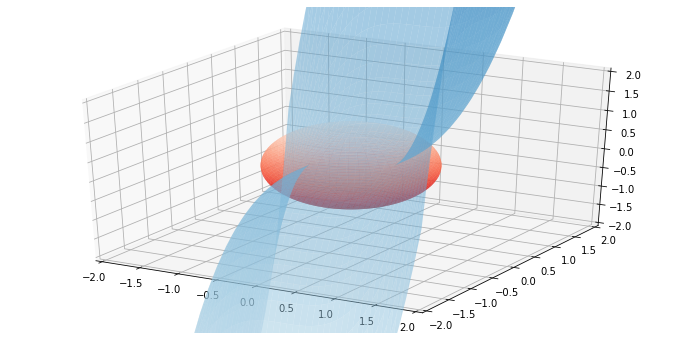

In [9]:
"""
1) Identify maxima /minima for the surface z= x^3 + y^3 subject to the constraint on the sphere x^2 + y^2 + z^2 = 1
2) Lagrange multipliers will be used to perform the optimization
3) Both the function and the constraint will be plotted , the intersection, and the critical points will be shown grpahically 
"""

# %matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

# This part calculates the lagrange multipliers and critical points analytically

x,y,z,d,w = sp.symbols('x y z d w')
varlist = [x,y,z,d,w]
equations = []
def constraint1(x,y,z):
    return x**3 + y**3 - z
def constraint2(x,y,z):
    return x**2 + y**2 + z**2 - 1
aug_func = z + d*constraint1(x,y,z) + w*constraint2(x,y,z)
for var in varlist:
    equations. append(aug_func.diff(var))
print(equations)
soln = sp.solve(equations ,[x,y,z,d,w])
print('\n')
print(soln)


"""
soln_dict = {}
for solution in soln:
    x,y,z,_ = solution
    soln_dict[solution] = float(objective(x,y,z))
print(soln_dict)
max_key = max(soln_dict, key=soln_dict.get)
min_key = min(soln_dict, key=soln_dict.get)
print( "The maxima is {0} for {1} \n".format(soln_dict[max_key] , max_key))

print( "The minima is {0} for {1} \n".format(soln_dict[min_key] , min_key))
"""
# Below code will plot the unit sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)
fig = plt.figure(figsize=plt.figaspect(0.5)*1.5) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.gca(projection='3d')

ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.set_zlim([-2,2])


# Below code will plot z = x^3 + y^3


xrange1 = np.linspace(-2, 2, 50)
yrange1 = np.linspace(-2, 2, 50)
x1,y1 = np.meshgrid(xrange1, yrange1)
z1 = x1**3 + y1**3

ax.plot_surface(x, y, z,cmap='Reds_r', antialiased=True, alpha = 0.7,zorder=0)
ax.plot_surface(x1, y1, z1,cmap = 'Blues', antialiased=True, alpha = 0.5,zorder=0)

#Plot the intersection points

for solution in soln:
    x = float(solution[0])
    y = float(solution[1])
    z = float(solution[2])
    ax.scatter(x,y,z , marker = "X", color="black",s=50,zorder = 10)
    
plt.show()


Matrix([
[2, 4,  0],
[0, 4, -2],
[2, 0, -2]])

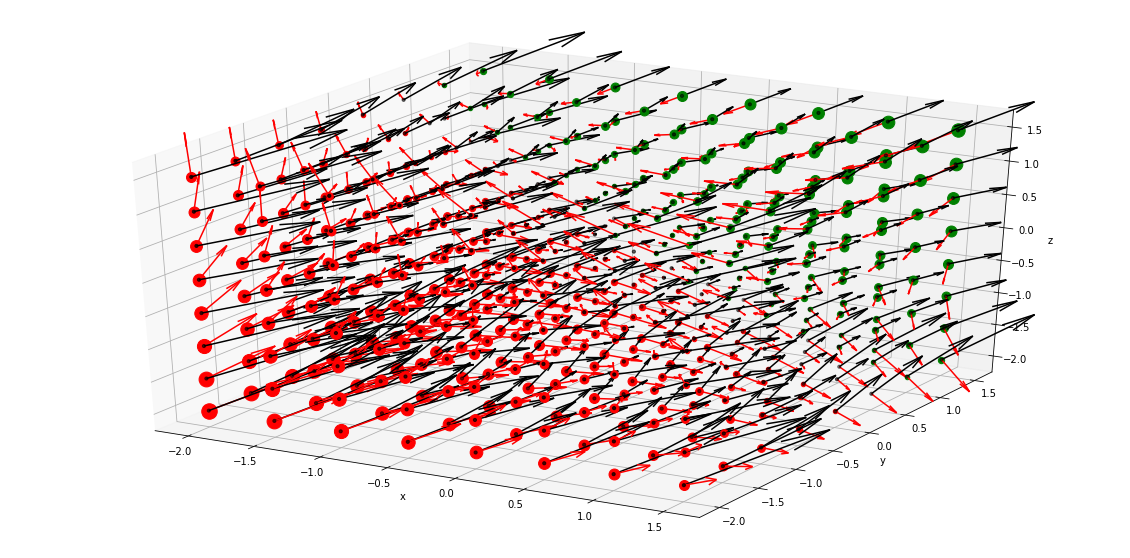

In [45]:
# %matplotlib inline

import numpy as np
import sympy as sp
from sympy import lambdify
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

#Draw the figure

fig = plt.figure(1,figsize=(20,10))
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
x, y, z = np.meshgrid(np.arange(-2, 2, 0.5),
                      np.arange(-2, 2, 0.5),
                      np.arange(-2, 2, 0.5))

x = x.reshape(np.product(x.shape))
y = y.reshape(np.product(y.shape))
z = z.reshape(np.product(z.shape))
ax.scatter(x,y,z , marker = "o", color="black",s=10)

# Declare the vector field
#vector_field = (x**2 + y**2)*i + (y**2 + z**2)*j + (z**2 + x**2)*k

P = x**2 + y**2
Q = y**2 + z**2
R = z**2 + x**2
lengths = np.sqrt(x**2+y**2+z**2)

# Plot the Vector field

for x1,y1,z1,u1,v1,w1,l in zip(x,y,z,P,Q,R,lengths):
    ax.quiver(x1, y1, z1, u1, v1, w1,length=l*0.03, color = "black")

# Plot the curl

a,b,c = sp.symbols('a b c')
Pa = a**2 + b**2
Qb = b**2 + c**2
Rc = c**2 + a**2
I = (sp.diff(Rc , b) - sp.diff(Qb, c))
J = (sp.diff(Pa , c) - sp.diff(Rc, a))
K = (sp.diff(Qb , a) - sp.diff(Pa, b))

i= lambdify((a,b,c), I , "numpy")
j= lambdify((a,b,c), J , "numpy")
k = lambdify((a,b,c), K , "numpy")
for x1,y1,z1,u1,v1,w1,l in zip(x,y,z,i(x,y,z),j(x,y,z),k(x,y,z),lengths):
    ax.quiver(x1, y1, z1, u1, v1, w1,length=l*0.03, color = "red")

# Plot the divergence

divSp = sp.diff(Pa , a) + sp.diff(Qb , b) + sp.diff(Rc , c)
divnp = lambdify((a,b,c) , divSp ,"numpy")

col = np.where(divnp(x,y,z) > 0 , 'green' , 'red')
#colors=['red' if divnp(x,y,z) <=0 else 'green' if divnp(x,y,z) > 0]
for x1,y1,z1,d1,m in zip(x,y,z,abs(divnp(x,y,z)), col):
    ax.scatter(x1, y1, z1,s = d1*20, c = m)

# calculate jacobian

mat = sp.Matrix([Pa, Qb, Rc])
varMat = sp.Matrix([a,b,c])
mat.jacobian(varMat).subs([(a,1),(b,2),(c,-1)])